[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of documents: 44898

Class Balance:
fake    52.298543
true    47.701457 

Average document length (in characters): 2469.1096930820972

Number of unique words: 122002

Most popular words (without stopword processing):
the: 1026019
to: 536553
of: 441915
and: 409052
in: 352815
that: 239899
on: 192185
for: 173375
is: 166728
trump: 134000

Most popular words (with stopword processing):
trump: 134000
said: 132825
president: 55892
would: 55167
people: 41857
one: 37927
state: 34488
also: 31357
new: 31311
reuters: 29425


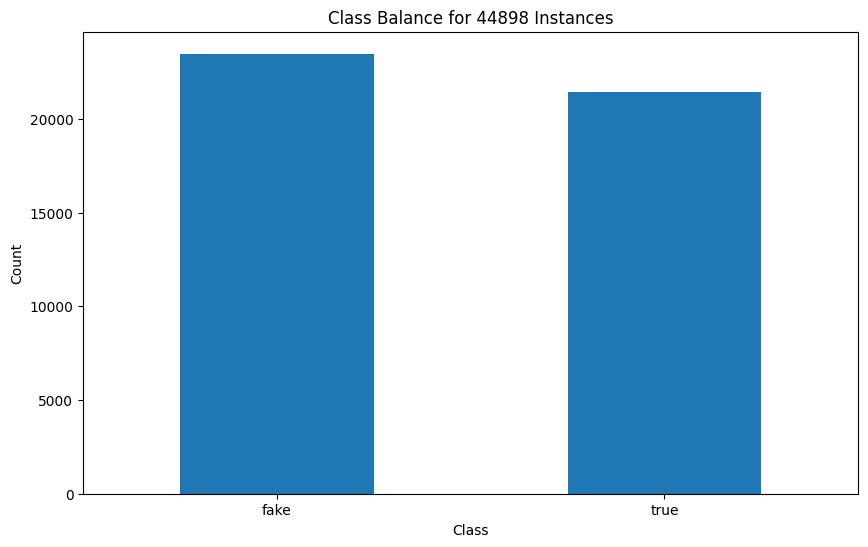

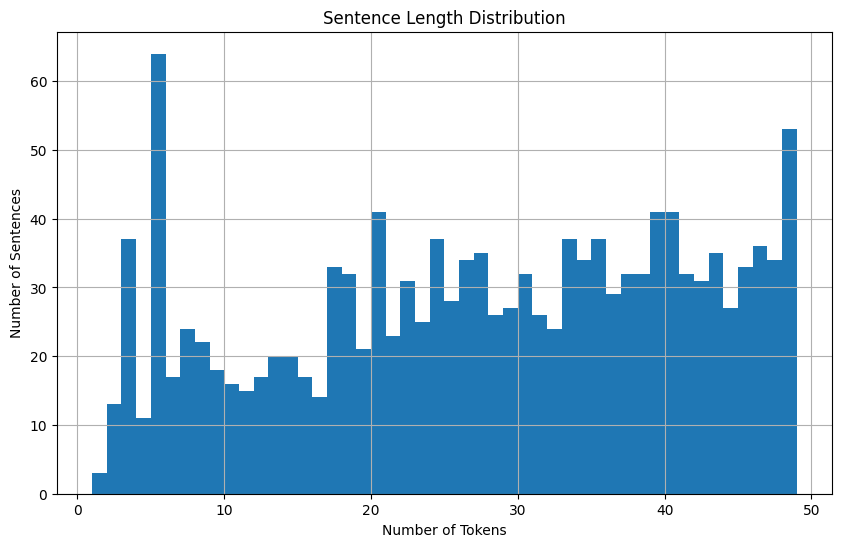

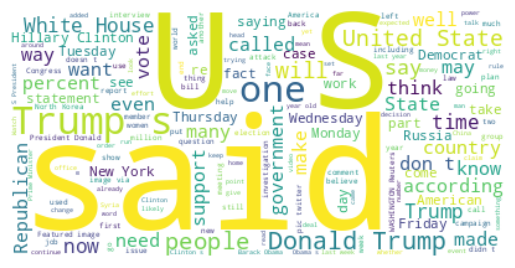

In [ ]:
# EDA
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

def analyze_csv(file_path):

    # Load CSV file
    df = pd.read_csv(file_path)

    # Number of documents
    num_documents = len(df)
    print(f"Number of documents: {num_documents}\n")

    # Class balance
    class_balance = df['target'].value_counts(normalize=True) * 100
    class_balance_str = class_balance.to_string()
    print("Class Balance:")
    print(class_balance_str, '\n')

    # Average length of document/text
    avg_doc_length = df['text'].dropna().apply(len).mean()
    print(f"Average document length (in characters): {avg_doc_length}\n")

    # Number of unique words
    df['text'].fillna("", inplace=True)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['text'])
    num_unique_words = len(vectorizer.get_feature_names_out())
    print(f"Number of unique words: {num_unique_words}\n")

    # Text statistics: Word frequency & Most popular words
    word_freq = X.sum(axis=0)
    word_freq = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    print("Most popular words (without stopword processing):")
    for word, freq in word_freq[:10]:
        print(f"{word}: {freq}")

    # Stopword processing and most common words after
    stop_words = list(stopwords.words('english'))
    vectorizer_sw = CountVectorizer(stop_words=stop_words)
    X_sw = vectorizer_sw.fit_transform(df['text'])
    word_freq_sw = X_sw.sum(axis=0)
    word_freq_sw = [(word, word_freq_sw[0, idx]) for word, idx in vectorizer_sw.vocabulary_.items()]
    word_freq_sw = sorted(word_freq_sw, key=lambda x: x[1], reverse=True)

    print("\nMost popular words (with stopword processing):")
    for word, freq in word_freq_sw[:10]:
        print(f"{word}: {freq}")

# Function to plot class balance
def plot_class_balance(file_path):
    df = pd.read_csv(file_path)
    class_counts = df['target'].value_counts()
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.title('Class Balance for {} Instances'.format(len(df)))
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Function to plot sentence length distribution
def plot_sentence_length_distribution(file_path):
    df = pd.read_csv(file_path)

    # Ensure that text column is string type and handle missing values
    df['text'] = df['text'].astype(str)

    # Tokenize the text into words
    df['tokens'] = df['text'].apply(nltk.word_tokenize)

    # Calculate sentence length
    df['sentence_length'] = df['tokens'].apply(len)

    # Plot
    plt.figure(figsize=(10, 6))
    df['sentence_length'].hist(bins=range(1, 50))
    plt.title('Sentence Length Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Number of Sentences')
    plt.show()

# Function to generate a word cloud
def generate_word_cloud(file_path):
    df = pd.read_csv(file_path)
    # Concatenate all the text in the dataframe
    text = " ".join(review for review in df.text if isinstance(review, str))

    # Generate the word cloud image
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the word cloud using matplotlib
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    file_path = '/content/data/fakenews.csv'
    analyze_csv(file_path)
    plot_class_balance(file_path)
    plot_sentence_length_distribution(file_path)
    generate_word_cloud(file_path)

In [ ]:
!pip install -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.2 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=0f8e2187f04c4c24a95b58bac8025c71b03878b237c4256408185dec3e2f094a
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


Training for fold 1...
Epoch 1/5
898/898 [==============================] - 578s 624ms/step - loss: 0.2164 - accuracy: 0.8818 - recall: 0.8646 - precision: 0.9043 - auc: 0.9666 - f1_score: 0.8840 - val_loss: 0.0155 - val_accuracy: 0.9972 - val_recall: 0.9968 - val_precision: 0.9979 - val_auc: 0.9986 - val_f1_score: 0.9973
Epoch 2/5
898/898 [==============================] - 545s 607ms/step - loss: 0.0111 - accuracy: 0.9977 - recall: 0.9984 - precision: 0.9971 - auc: 0.9991 - f1_score: 0.9978 - val_loss: 0.0101 - val_accuracy: 0.9979 - val_recall: 0.9979 - val_precision: 0.9981 - val_auc: 0.9994 - val_f1_score: 0.9980
Epoch 3/5
898/898 [==============================] - 544s 606ms/step - loss: 0.0083 - accuracy: 0.9981 - recall: 0.9991 - precision: 0.9973 - auc: 0.9994 - f1_score: 0.9982 - val_loss: 0.0083 - val_accuracy: 0.9979 - val_recall: 0.9979 - val_precision: 0.9981 - val_auc: 0.9996 - val_f1_score: 0.9980
Epoch 4/5
898/898 [==============================] - 544s 606ms/step - los

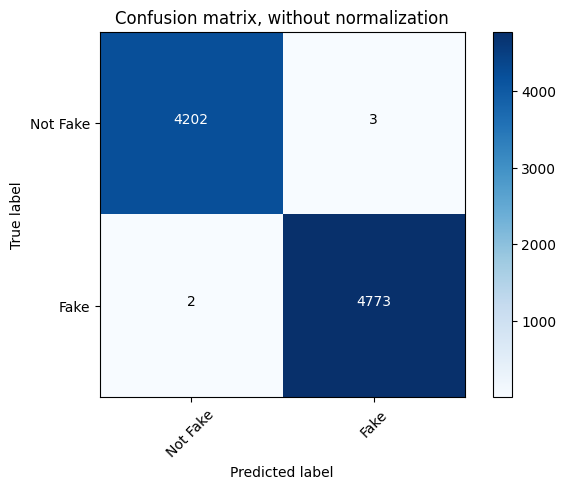

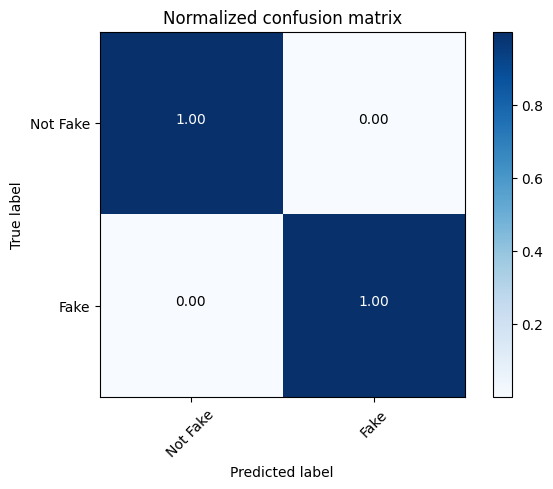

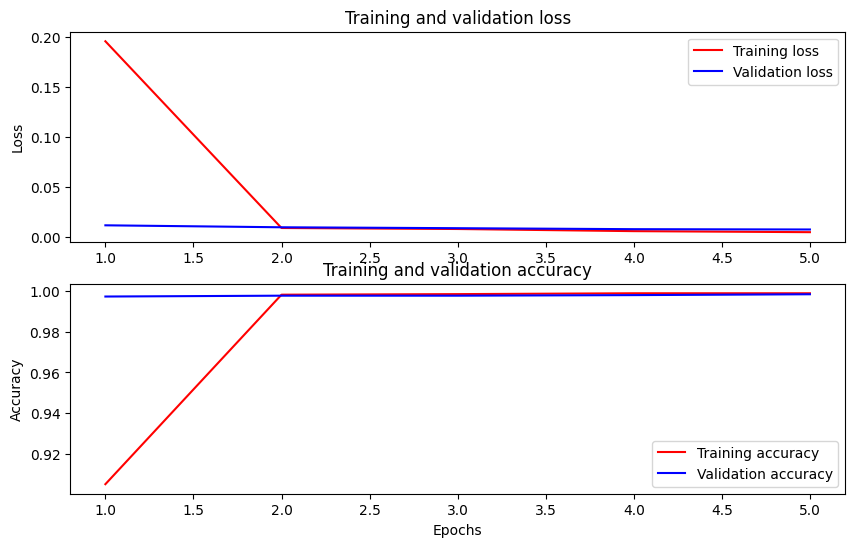

In [ ]:
# BERT

import os
import shutil
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

tf.get_logger().setLevel('ERROR')

# Load data
train_df = pd.read_csv('/content/data/fakenews.csv')
train_df, test_df = train_test_split(train_df, test_size=0.2)

def df_to_dataset(dataframe, shuffle=True, batch_size=32, include_title=True):
    df = dataframe.copy()
    df.dropna(subset=['text'], inplace=True)
    if include_title:
        df['title'].fillna('', inplace=True)
        df['text'] = df['title'] + " " + df['text']
    df['text'] = df['text'].astype(str)

    label_map = {'true': 0, 'TRUE': 0, 'fake': 1}
    df['target'] = df['target'].map(label_map).astype('int32')

    labels = df.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((df['text'].values, labels))

    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))

    ds = ds.batch(batch_size)
    return ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Convert test DataFrame to TensorFlow Dataset
batch_size = 32
test_ds = df_to_dataset(test_df, shuffle=False, batch_size=batch_size)

# Model definition
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2'

def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    return tf.keras.Model(text_input, net)

# Loss Function (Binary cross entropy loss function)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# K-fold Cross-validation
epochs = 5
kfold = KFold(n_splits=5, shuffle=True)
fold_no = 1

for train, val in kfold.split(train_df):
    train_ds = df_to_dataset(train_df.iloc[train], batch_size=batch_size)
    val_ds = df_to_dataset(train_df.iloc[val], shuffle=False, batch_size=batch_size)

    # Optimizer setup
    steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
    num_train_steps = steps_per_epoch * epochs
    num_warmup_steps = int(0.1 * num_train_steps)
    init_lr = 3e-5
    optimizer = optimization.create_optimizer(init_lr=init_lr,
                                              num_train_steps=num_train_steps,
                                              num_warmup_steps=num_warmup_steps,
                                              optimizer_type='adamw')
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.AUC(name='auc'),
        F1Score()
    ]

    # Compile the model for each fold
    classifier_model = build_classifier_model()
    classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # Train the model
    print(f'Training for fold {fold_no}...')
    history = classifier_model.fit(x=train_ds, validation_data=val_ds, epochs=epochs)
    fold_no += 1

# Save the model after training
dataset_name = 'fake_news'
saved_model_path = '/content/model/{}_bert'.format(dataset_name.replace('/', '_'))
classifier_model.save(saved_model_path, include_optimizer=False)
print(f'Model saved to {saved_model_path}')

# Evaluate Model on Test Set
results = classifier_model.evaluate(test_ds)
print(f'Loss: {results[0]}')
print(f'Accuracy: {results[1]}')
print(f'Recall: {results[2]}')
print(f'Precision: {results[3]}')
print(f'AUC: {results[4]}')
print(f'F1Score: {results[5]}')

test_predictions_proba = classifier_model.predict(test_ds)
test_predictions = np.round(test_predictions_proba)
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
cm = confusion_matrix(true_labels, test_predictions)
print("Confusion Matrix:")
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Not Fake', 'Fake'], title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=['Not Fake', 'Fake'], normalize=True, title='Normalized confusion matrix')
plt.show()

# Plotting
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
# Load Bert Model

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2'

# Reload the saved model
saved_model_path = '/content/model/fake_news_bert'
model = tf.keras.models.load_model(saved_model_path, custom_objects={'KerasLayer': hub.KerasLayer})

examples = [
    'WATCH: Donald Trump Fits In Perfectly As Villain On Game Of Thrones Mashup, Donald Trump s statements are frightening to those who see the danger of his rise and his antics are certainly theatrical. Maybe that s why he fits in perfectly in this amazing Game of Thrones mashup clip.Watch Video Here: [youtube https://www.youtube.com/watch?v=I0tE6T-ecmg]His face, along with quotes from his speeches and interviews, is cut into a mashup of the HBO hit drama as the viewer gets a sense of both the hilarity as well as the absurdity that is Donald Trump. It seems that Trump fits in quite well in the Seven Kingdoms. Produced by Australian satirist Huw Parkinson, the video begins with Trump turning away Daenerys Targaryen from the city of Quarth.Trump later attacks Pope Francis for criticizing him and complimented himself, saying he was a  nice guy.  He also said that he s going to build a massive wall and negotiates with Littefinger.Although the video is entertaining, it also sends a strong message about both the absurdity and the danger that is Trump. If his current stances on everything from banning Muslims to attacking Mexican immigrants are backed up with actual power by winning the presidency, then he ll not only be a danger to those communities, but will bring to power all of the racists that have backed him thus far, making America quite a dangerous place. Featured image via screenshot',
    'OBAMA AND VALERIE JARRETT Finalize Executive Action Gun Control Proposal, It s almost as though we don t even have a Constitution Never let a crisis go to waste President Barack Obama s advisers are finalizing a proposal that would expand background checks on gun sales without congressional approval.White House adviser Valerie Jarrett says the president has asked his team to complete a proposal and submit it for his review  in short order.  She says the recommendations will include measures to expand background checks.Jarrett spoke Wednesday night at a vigil for the victims of the Newtown shooting, according to a summary provided by the White House.After the mass shooting in Roseburg, Oregon, Obama said his team was looking for ways to tighten gun laws without a vote in Congress. White House officials have said they re exploring closing the so-called  gun show loophole  that anti-gun advocates claim allows people to buy weapons at gun shows and online without a background check.The move comes following the deadly terrorist attack in San Bernardino, California, that left 14 people dead. All of the guns used in the massacre were purchased legally. Opponents of new gun control regulations have argued that the proposals being pushed by Obama would not have prevented the tragedy or recent mass shootings. Via: The Blaze',
    'Exclusive: Trump says "major, major" conflict with North Korea possible, but seeks diplomacy, WASHINGTON (Reuters) - U.S. President Donald Trump said on Thursday a major conflict with North Korea is possible in the standoff over its nuclear and missile programs, but he would prefer a diplomatic outcome to the dispute.  “There is a chance that we could end up having a major, major conflict with North Korea. Absolutely,” Trump told Reuters in an Oval Office interview ahead of his 100th day in office on Saturday.  Nonetheless, Trump said he wanted to peacefully resolve a crisis that has bedeviled multiple U.S. presidents, a path that he and his administration are emphasizing by preparing a variety of new economic sanctions while not taking the military option off the table.  “We’d love to solve things diplomatically but it’s very difficult,” he said.  REUTERS RECOMMENDS Racism on the rise: Reuters poll How North Korea gets its oil from China In other highlights of the 42-minute interview, Trump was cool to speaking again with Taiwan’s president after an earlier telephone call with her angered China.  He also said he wants South Korea to pay the cost of the U.S. THAAD anti-missile defense system, which he estimated at $1 billion, and intends to renegotiate or terminate a U.S. free trade pact with South Korea because of a deep trade deficit with Seoul.  Asked when he would announce his intention to renegotiate the pact, Trump said: “Very soon. I’m announcing it now.”  Trump also said he was considering adding stops to Israel and Saudi Arabia to a Europe trip next month, emphasizing that he wanted to see an Israeli-Palestinian peace. He complained that Saudi Arabia was not paying its fair share for U.S. defense.  Asked about the fight against Islamic State, Trump said the militant group had to be defeated.  “I have to say, there is an end. And it has to be humiliation,” he said, when asked about what the endgame was for defeating Islamist violent extremism.  Trump said North Korea was his biggest global challenge. He lavished praise on Chinese President Xi Jinping for Chinese assistance in trying to rein in Pyongyang. The two leaders met in Florida earlier this month.  “I believe he is trying very hard. He certainly doesn’t want to see turmoil and death. He doesn’t want to see it. He is a good man. He is a very good man and I got to know him very well.  “With that being said, he loves China and he loves the people of China. I know he would like to be able to do something, perhaps it’s possible that he can’t,” Trump said.  Trump spoke just a day after he and his top national security advisers briefed U.S. lawmakers on the North Korean threat and one day before Secretary of State Rex Tillerson will press the United Nations Security Council on sanctions to further isolate Pyongyang over its nuclear and missile programs.  The Trump administration on Wednesday declared North Korea “an urgent national security threat and top foreign policy priority.” It said it was focusing on economic and diplomatic pressure, including Chinese cooperation in containing its defiant neighbor and ally, and remained open to negotiations.  U.S. officials said military strikes remained an option but played down the prospect, though the administration has sent an aircraft carrier and a nuclear-powered submarine to the region in a show of force.  Any direct U.S. military action would run the risk of massive North Korean retaliation and huge casualties in Japan and South Korea and among U.S. forces in both countries.  Trump, asked if he considered North Korean leader Kim Jong Un to be rational, said he was operating from the assumption that he is rational. He noted that Kim had taken over his country at an early age.  “He’s 27 years old. His father dies, took over a regime. So say what you want but that is not easy, especially at that age.  “I’m not giving him credit or not giving him credit, I’m just saying that’s a very hard thing to do. As to whether or not he’s rational, I have no opinion on it. I hope he’s rational,” he said.  Trump, sipping a Coke delivered by an aide after the president ordered it by pressing a button on his desk, rebuffed an overture from Taiwan President Tsai Ing-wen, who told Reuters a direct phone call with Trump could take place again after their first conversation in early December angered Beijing.  China considers neighboring Taiwan to be a renegade province.  “My problem is that I have established a very good personal relationship with President Xi,” said Trump. “I really feel that he is doing everything in his power to help us with a big situation. So I wouldn’t want to be causing difficulty right now for him.  “So I would certainly want to speak to him first.”  Trump also said he hoped to avoid a potential government shutdown amid a dispute between congressional Republicans and Democrats over a spending deal with a Saturday deadline looming.  But he said if a shutdown takes place, it will be the Democrats’ fault for trying to add money to the legislation to “bail out Puerto Rico” and other items.  He also defended the one-page tax plan he unveiled on Wednesday from criticism that it would increase the U.S. deficit, saying better trade deals and economic growth would offset the costs.  “We will do trade deals that are going to make up for a tremendous amount of the deficit. We are going to be doing trade deals that are going to be much better trade deals,” Trump said.',
]

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')

predictions_proba = model.predict(examples)
predictions_labels = (predictions_proba > 0.5).astype(int)

# Interpret Predictions
results = ['Reliable' if label == 0 else 'Unreliable' for label in predictions_labels]

for i, result in enumerate(results):
    print(f"Example {i+1}: {result}")


1/1 [==============================] - 0s 405ms/step
Example 1: Unreliable
Example 2: Unreliable
Example 3: Reliable


In [ ]:
!pip install transformers transformers-interpret

In [ ]:
!zip -r /content/model.zip /content/model

In [ ]:
from google.colab import files
files.download("/content/model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing other Model
# Add/Remove comments for coresponding models to get each
# Group member was advised not to write code like this in the future
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from joblib import dump

# Load dataset
train_df = pd.read_csv('/content/data/fakenews.csv')
train_df, test_df = train_test_split(train_df, test_size=0.2)

# Ensure the 'text' column does not have NaN values
train_df.dropna(subset=['text'], inplace=True)
test_df.dropna(subset=['text'], inplace=True)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)

# Fit and transform the training data, and transform the testing data
X_train_tfidf = tfidf.fit_transform(train_df['text']).toarray()
X_test_tfidf = tfidf.transform(test_df['text']).toarray()

# Labels
y_train = train_df['target']
y_test = test_df['target']

# Model
# MutinomialNB
#nb_clf = MultinomialNB()
#nb_clf.fit(X_train_tfidf, y_train)
# Logistic Regression
#log_reg_clf = LogisticRegression(max_iter=1000)
#log_reg_clf.fit(X_train_tfidf, y_train)
# SVM
#svm_clf = SVC(kernel='linear', C=1.0)
#svm_clf.fit(X_train_tfidf, y_train)
# Random Forest
#rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_clf.fit(X_train_tfidf, y_train)
# Adaboost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_tfidf, y_train)

# Predictions
#y_pred = nb_clf.predict(X_test_tfidf)
#y_pred = log_reg_clf.predict(X_test_tfidf)
#y_pred = svm_clf.predict(X_test_tfidf)
#y_pred = rf_clf.predict(X_test_tfidf)
y_pred = ada_clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save model
#model_filename = '/content/model/multinomial_nb_classifier.joblib'
#dump(nb_clf, model_filename)
#model_filename = '/content/model/logistic_regression_classifier.joblib'
#dump(log_reg_clf, model_filename)
#model_filename = '/content/model/svm_classifier.joblib'
#dump(svm_clf, model_filename)
#model_filename = '/content/model/random_forest_classifier.joblib'
#dump(rf_clf, model_filename)
model_filename = '/content/model/adaboost_classifier.joblib'
dump(ada_clf, model_filename)

print(f"Model saved to {model_filename}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from joblib import dump

# Load dataset
train_df = pd.read_csv('/content/data/fakenews.csv')
train_df, test_df = train_test_split(train_df, test_size=0.2)

# Ensure the 'text' column does not have NaN values
train_df.dropna(subset=['text'], inplace=True)
test_df.dropna(subset=['text'], inplace=True)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)

# Fit and transform the training data, and transform the testing data
X_train_tfidf = tfidf.fit_transform(train_df['text']).toarray()
X_test_tfidf = tfidf.transform(test_df['text']).toarray()

# Labels
y_train = train_df['target']
y_test = test_df['target']

# Model
# Adaboost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = ada_clf.predict(X_test_tfidf)

# Probabilities for AUC
y_prob = ada_clf.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='true')
recall = recall_score(y_test, y_pred, pos_label='true')
precision = precision_score(y_test, y_pred, pos_label='true')
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"AUC: {auc}")

# Save model
model_filename = '/content/model/adaboost_classifier.joblib'
dump(ada_clf, model_filename)

tfidf_filename = '/content/model/tfidf_vectorizer.joblib'
dump(tfidf, tfidf_filename)

Accuracy: 0.9968819599109131
F1 Score: 0.9967712177121771
Recall: 0.9970011534025375
Precision: 0.9965413880562601
AUC: 0.9998162998498963
Model saved to /content/model/adaboost_classifier.joblib
TfidfVectorizer saved to /content/model/tfidf_vectorizer.joblib
Model saved to /content/model/adaboost_classifier.joblib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('/content/data/fakenews.csv')

# Preprocess the dataset
# Encode the target labels
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['title', 'text']], df['target'], test_size=0.2, random_state=42)

# Combine title and text for feature extraction
X_train['combined_text'] = X_train['title'] + ' ' + X_train['text']
X_test['combined_text'] = X_test['title'] + ' ' + X_test['text']

# Create a pipeline with CountVectorizer and AdaBoostClassifier
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('clf', AdaBoostClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train['combined_text'], y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test['combined_text'])
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save the model
joblib.dump(pipeline, 'fake_news_detection_model.pkl')


Accuracy: 0.995879732739421


['fake_news_detection_model.pkl']